In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Dense,Activation,Flatten,ZeroPadding2D,Conv2D,BatchNormalization
from keras.layers import AveragePooling2D,MaxPooling2D,GlobalAveragePooling2D,GlobalMaxPooling2D,Dropout
from keras.optimizers import SGD,RMSprop,adam
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar100


In [3]:
import os
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


In [4]:
from keras.utils import layer_utils
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG


In [5]:
path1="C:\dataset 3"
path2="C:\dataset 3 after preprocessing"

In [6]:
listing=os.listdir(path1)

In [7]:
from PIL import Image

In [8]:
for file in listing:
    im=Image.open(path1 +'\\'+ file)
    im=im.resize((224,224))
    im.save(path2 + '\\'+ file,"JPEG")

In [9]:
newlist=os.listdir(path2)

In [10]:
immatrix=np.array([np.array(Image.open('C:\dataset 3 after preprocessing'+ '\\'+im)).flatten() for im in newlist],'f')

In [11]:
immatrix.shape

(4323, 150528)

In [12]:
immatrix.shape[0]

4323

In [13]:
label=np.ones((immatrix.shape[0],),dtype=int)

In [14]:
label[0:770]=0
label[770:1053]=1
label[1053:1837]=2
label[1837:2571]=3
label[2571:]=4

In [15]:
data,label=shuffle(immatrix,label,random_state=2)

In [16]:
train_data=[data,label]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


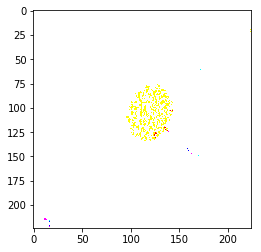

In [17]:
img=immatrix[1].reshape(224,224,3)
plt.imshow(img)

In [18]:
print(train_data[0].shape)

(4323, 150528)


In [19]:
x,y=(train_data[0],train_data[1])

In [20]:
x_train=x[:-2573,:]
y_train=y[:-2573]


In [21]:
x_test=x[-1750:,:]
y_test=y[-1750:]


In [22]:
x_train=x_train.reshape(x_train.shape[0],224,224,3)
x_test=x_test.reshape(x_test.shape[0],224,224,3)

In [23]:
# x_train=x_train.astype('float32')
# x_test=x_test.astype('float32')

In [24]:
x_train/=255
x_test/=255

In [25]:
print(x_train.shape)
print(x_test.shape)

(1750, 224, 224, 3)
(1750, 224, 224, 3)


In [26]:
y_train=np_utils.to_categorical(y_train,5)
y_test=np_utils.to_categorical(y_test,5)

In [27]:
print(y_train.shape)
print(y_test.shape)

(1750, 5)
(1750, 5)


In [28]:
#alexenet

In [29]:
model=Sequential()
model.add(Conv2D(96,(11,11),strides=(4,4),padding="valid",input_shape=(224,224,3)))
convout1=Activation('relu')
model.add(convout1)
model.add(MaxPooling2D((3,3),strides=(2,2)))
model.add(Conv2D(256,(5,5),padding="same"))
convout2=Activation('relu')
model.add(convout2)
model.add(MaxPooling2D((3,3),strides=(2,2)))
model.add(Conv2D(384,(3,3),padding="same"))
convout3=Activation('relu')
model.add(convout3)
model.add(Conv2D(384,(3,3),padding="same"))
convout4=Activation('relu')
model.add(convout4)
model.add(Conv2D(256,(3,3),padding="same"))
convout5=Activation('relu')
model.add(convout5)
model.add(MaxPooling2D((3,3),strides=(2,2)))

model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(optimizer='adadelta',loss='categorical_crossentropy',metrics=["accuracy"])





In [30]:
model.fit(x_train,y_train,epochs=50,batch_size=800,validation_data=(x_test,y_test))

Train on 1750 samples, validate on 1750 samples
Epoch 1/50
1750/1750 [==============================] - 434s 248ms/step - loss: 5.9513 - acc: 0.2594 - val_loss: 13.2445 - val_acc: 0.1783
Epoch 2/50
1750/1750 [==============================] - 390s 223ms/step - loss: 13.1432 - acc: 0.1846 - val_loss: 13.2445 - val_acc: 0.1783
Epoch 3/50
1750/1750 [==============================] - 387s 221ms/step - loss: 13.1432 - acc: 0.1846 - val_loss: 13.2445 - val_acc: 0.1783
Epoch 4/50
1750/1750 [==============================] - 389s 222ms/step - loss: 13.1432 - acc: 0.1846 - val_loss: 13.2445 - val_acc: 0.1783
Epoch 5/50
1750/1750 [==============================] - 389s 222ms/step - loss: 13.1432 - acc: 0.1846 - val_loss: 13.2445 - val_acc: 0.1783
Epoch 6/50
1750/1750 [==============================] - 391s 223ms/step - loss: 13.1432 - acc: 0.1846 - val_loss: 13.2445 - val_acc: 0.1783
Epoch 7/50
1750/1750 [==============================] - 389s 222ms/step - loss: 13.1432 - acc: 0.1846 - val_loss:

In [31]:
score=model.evaluate(x_test,y_test)
print("test score",score[0])
print("test accuracy",score[1])
print(model.predict_classes(x_test[1:5]))
print(y_test[1:5])

1750/1750 [==============================] - 54s 31ms/step
test score 13.2444693614
test accuracy 0.178285714354
[2 2 2 2]
[[ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.]]
